# Using large language models for exploratory data analysis

The following Google Colab notebook implements an simple exploratory data analysis with Pandas.AI, Azure's OpenAI GPT-4 on a SQLite3's northwind database.

### Install Libraries

In [ ]:
!pip3 --quiet install pandasai

### Download the Northwind database for SQLite3

In [ ]:
!wget https://tdmdal.github.io/mma-sql-2021/data/northwind.sqlite3

### Load the SQL magic extension

[this extension](https://github.com/catherinedevlin/ipython-sql) allows us to connect to DBs and issue SQL command

In [3]:
%load_ext sql

In [17]:
from pandasai import SmartDataframe
from pandasai.connectors import SqliteConnector
from pandasai.llm.azure_openai import AzureOpenAI
import getpass
import os

### Enter Azure OpenAI credentials

In [6]:
print('Enter AZURE_OPENAI_API_KEY:')
AZURE_OPENAI_API_KEY = getpass.getpass()

Enter AZURE_OPENAI_API_KEY:
··········


In [9]:
print('Enter AZURE_OPENAI_ENDPOINT:')
AZURE_OPENAI_API_ENDPOINT = getpass.getpass()

Enter AZURE_OPENAI_ENDPOINT:
··········


In [15]:
chat_llm = AzureOpenAI(
    deployment_name="gpt-4",
    model_name="gpt-4",
    api_token=AZURE_OPENAI_API_KEY,
    azure_endpoint=AZURE_OPENAI_API_ENDPOINT,
    api_version='2023-05-15'
)

In [13]:
odbc_str = "northwind.sqlite3"
connector = SqliteConnector(config={
    "database" : odbc_str,
    "table" : "Orders",
})

In [26]:
df = SmartDataframe(connector, config={"llm": chat_llm})
df.chat('How many orders are there ?')

830

### Plotting

In [24]:
user_defined_path = os.getcwd()
df = SmartDataframe(connector, config={
    "save_charts": True,
    "save_charts_path": user_defined_path,
    "llm": chat_llm
    }
)

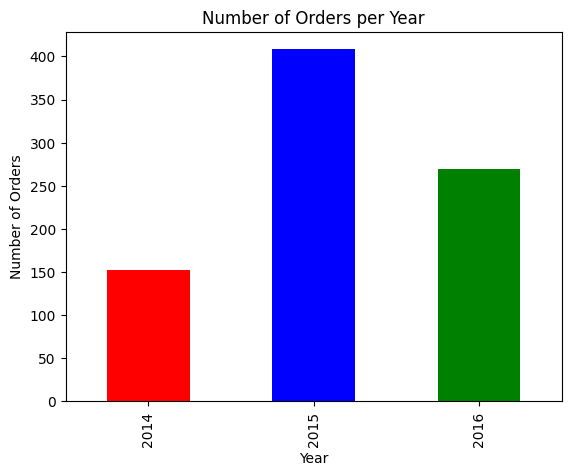

In [25]:
response = df.chat(
    "Plot the histogram of Products showing for each year, using different colors for each bar"
)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/smart_datalake_chat/code_execution.py", line 53, in execute
    result = pipeline_context.query_exec_tracker.execute_func(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 128, in execute_func
    result = function(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 212, in execute_code
    exec(code_to_run, environment)
  File "<string>", line 6, in <module>
NameError: name 'np' is not defined
. Retrying


<Figure size 1000x600 with 0 Axes>

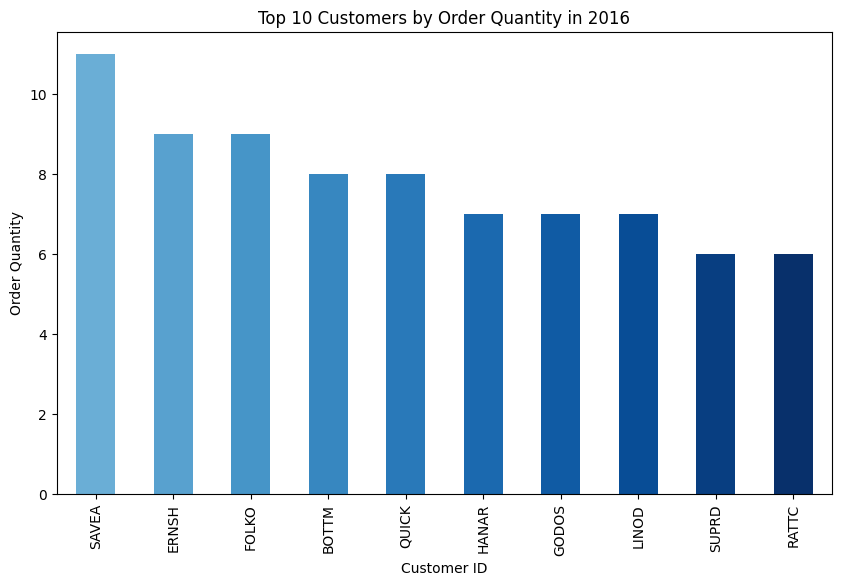

In [31]:
response = df.chat(
    "Plot the top 10 customers for 2016 by their order quantity, using different blue colors for each bar"
)

In [21]:
print(response)

/content/f5055380-1684-48a3-ba2b-50a27869119b.png
